In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline

In [2]:
MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels.flatten())):
        points = np.matrix([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

def plot_boundary(X, fn):
    
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    inputs = np.c_[xx.ravel(), yy.ravel()]
    inputs = np.apply_along_axis(transform_data, 1, inputs)
    
    predictions = fn(inputs)
    predictions = predictions.argmax(axis=1).reshape(xx.shape)

    plt.contour(xx, yy, predictions, colors='black')

In [5]:
def transform_data(x):
    values = [[i, i**2] for i in x]
    values = [i for pair in values for i in pair]
    #print(values)
    #return [item for sublist in l for item in sublist]
    #return [x[0], x[1], x[0] ** 2, x[1] ** 2]
    #return values
    return x

data = pd.read_csv('data.txt')
XX = data.as_matrix(columns=['alcohol', 'flavanoids'])
#XX = data.drop('class', 1).as_matrix()
#yy = label_binarize(data['class'], [1, 2, 3])[:,0]
#yy = np.array(yy.flatten()).ravel()
yy = np.array([i - 1 for i in data['class']])

training_in = XX
training_out = yy
training_in = np.apply_along_axis(transform_data, 1, training_in)
training_out = label_binarize(data['class'], [1, 2, 3])

weights: [[ 4.57513571 -6.97823238  2.40483356]
 [ 7.23694754  2.7342062  -9.97091579]]
bias: [-71.89368439  86.05293274 -14.1595583 ]
cost: 0.480514
predict: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 1 1 1 0 1 2 1 2 0 0 0
 1 1 0 1 1 0 1 0 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
accuracy: 0.893258426966
precision: 0.899059242309
recall: 0.910798122066


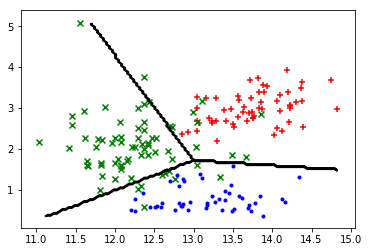

In [6]:
n_features = training_in.shape[1]
n_labels = training_out.shape[1]

x = tf.placeholder(tf.float32, [None, n_features], name='X')
y = tf.placeholder(tf.int32, [None, n_labels], name='y')

W = tf.Variable(tf.zeros([n_features, n_labels]), name='W')
b = tf.Variable(tf.zeros([n_labels]), name='b')

logits = tf.matmul(x, W) + b
predict = tf.nn.softmax(logits)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
opti = tf.train.GradientDescentOptimizer(0.3).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for i in range(60000):
        sess.run(opti, feed_dict={x: training_in, y: training_out})
        
    print('weights:', sess.run(W))
    print('bias:', sess.run(b))

    p = sess.run(predict, feed_dict={x: training_in}).argmax(axis=1)
    c = sess.run(cost, feed_dict={x: training_in, y: training_out})
    print('cost:', c)
    print('predict:', p)
    print('accuracy:', accuracy_score(training_out.argmax(axis=1), p))
    print('precision:', precision_score(training_out.argmax(axis=1), p, average='macro'))
    print('recall:', recall_score(training_out.argmax(axis=1), p, average='macro'))
    
    def pred(inputs):
        return sess.run(predict, feed_dict={x: inputs})
    
    plt.show()
    plot_boundary(training_in, pred)
    plot_points(training_in, training_out.argmax(axis=1))